In [87]:

!pip install tensorflow-gpu==2.3.1

In [88]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [91]:
# Mount your drive
# go to file and click mount drive option

In [92]:
data = pd.read_csv('/content/drive/My Drive/Datasets/household_power_consumption.txt',
                   sep=';',
                   parse_dates=True,
                   low_memory=False)

Dataset Link

https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

In [93]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [94]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [96]:
# Except sub_metering_3 all columns are object types

In [97]:
# Concatinating Date and Time together and separating with space
# Naming as date_time
data['date_time'] = data['Date'].str.cat(data['Time'],sep=' ')

In [98]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [99]:
# Removing data and Time features
# We are only using data_time as index
power_consumption_data = data.drop(['Date','Time'],axis =1)
power_consumption_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [100]:
# setting date_time as index
power_consumption_data.set_index(['date_time'],inplace = True)
power_consumption_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [101]:
data['date_time'][0]

'16/12/2006 17:24:00'

In [102]:
# Acessing other features using zeroth index
power_consumption_data['Global_active_power']['16/12/2006 17:24:00']

'4.216'

In [103]:
power_consumption_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
26/11/2010 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
26/11/2010 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
26/11/2010 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [104]:
power_consumption_data[:100]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
16/12/2006 18:59:00,4.224,0.090,231.960,18.200,0.000,1.000,16.0
16/12/2006 19:00:00,4.070,0.088,231.990,17.400,0.000,1.000,17.0
16/12/2006 19:01:00,3.612,0.090,232.360,15.600,0.000,2.000,16.0


In [105]:
# In data repository it is described that data in not and incomplete value is represented by ? complete at all
# replacing all ? values by nan
# 
power_consumption_data.replace('?',nan,inplace=True)
# converting object type to float
power_consumption_data = power_consumption_data.astype(float)
power_consumption_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [106]:
power_consumption_data[:20]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
16/12/2006 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
16/12/2006 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
16/12/2006 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
16/12/2006 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [107]:
# data type is converted to float
power_consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 206.7+ MB


In [108]:
power_consumption_data['Sub_metering_1']

date_time
16/12/2006 17:24:00    0.0
16/12/2006 17:25:00    0.0
16/12/2006 17:26:00    0.0
16/12/2006 17:27:00    0.0
16/12/2006 17:28:00    0.0
                      ... 
26/11/2010 20:58:00    0.0
26/11/2010 20:59:00    0.0
26/11/2010 21:00:00    0.0
26/11/2010 21:01:00    0.0
26/11/2010 21:02:00    0.0
Name: Sub_metering_1, Length: 2075259, dtype: float64

In [109]:
# checking if all data features is null
power_consumption_data.isnull()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,False,False,False,False,False,False,False
16/12/2006 17:25:00,False,False,False,False,False,False,False
16/12/2006 17:26:00,False,False,False,False,False,False,False
16/12/2006 17:27:00,False,False,False,False,False,False,False
16/12/2006 17:28:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
26/11/2010 20:58:00,False,False,False,False,False,False,False
26/11/2010 20:59:00,False,False,False,False,False,False,False
26/11/2010 21:00:00,False,False,False,False,False,False,False


In [110]:
np.isnan(power_consumption_data).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [111]:
# Every column has 25979 nan data


# We are replacing null value with the the day before value
# Creating function to fill missing values
def fill_missing_values(data):
  # Minutes in one day which is helpful to find day before one day
  one_day = 24*60
  for row in range(data.shape[0]):
    for col in range(data.shape[1]):
      if np.isnan(data[row,col]):
        data[row,col] = data[row-one_day,col]


In [112]:
fill_missing_values(power_consumption_data.values)

In [113]:
# Checking whether all the null values are replaced or not
# There are no null values
np.isnan(power_consumption_data).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [114]:
power_consumption_data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089418e+00,1.236871e-01,2.408364e+02,4.618401e+00,1.118474e+00,1.291131e+00,6.448635e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [115]:
data.shape

(2075259, 10)

### **Power consumption for each day**

In [116]:
# Storing our data to new csv file
# It writes inside content folder in colab drive
power_consumption_data.to_csv('preprocessed_household_power_consumption.csv')

In [117]:
# Loading data
datasets = pd.read_csv('preprocessed_household_power_consumption.csv',parse_dates=True,index_col='date_time',low_memory=False)
datasets.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


##**Exploratory Data  Analysis(EDA)**

In [118]:
# we have  data for every minute 
# Since our date_time data is not parsed 
# We are summing all minutes data and creating single day data

In [119]:
# Resample data according to the day
# datasets = datasets.resample('D')

# Resample and sum   all data  according to the day where data/datatime must be index
datasets = datasets.resample('D').sum()

# Now our data is sampled according to day
datasets.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


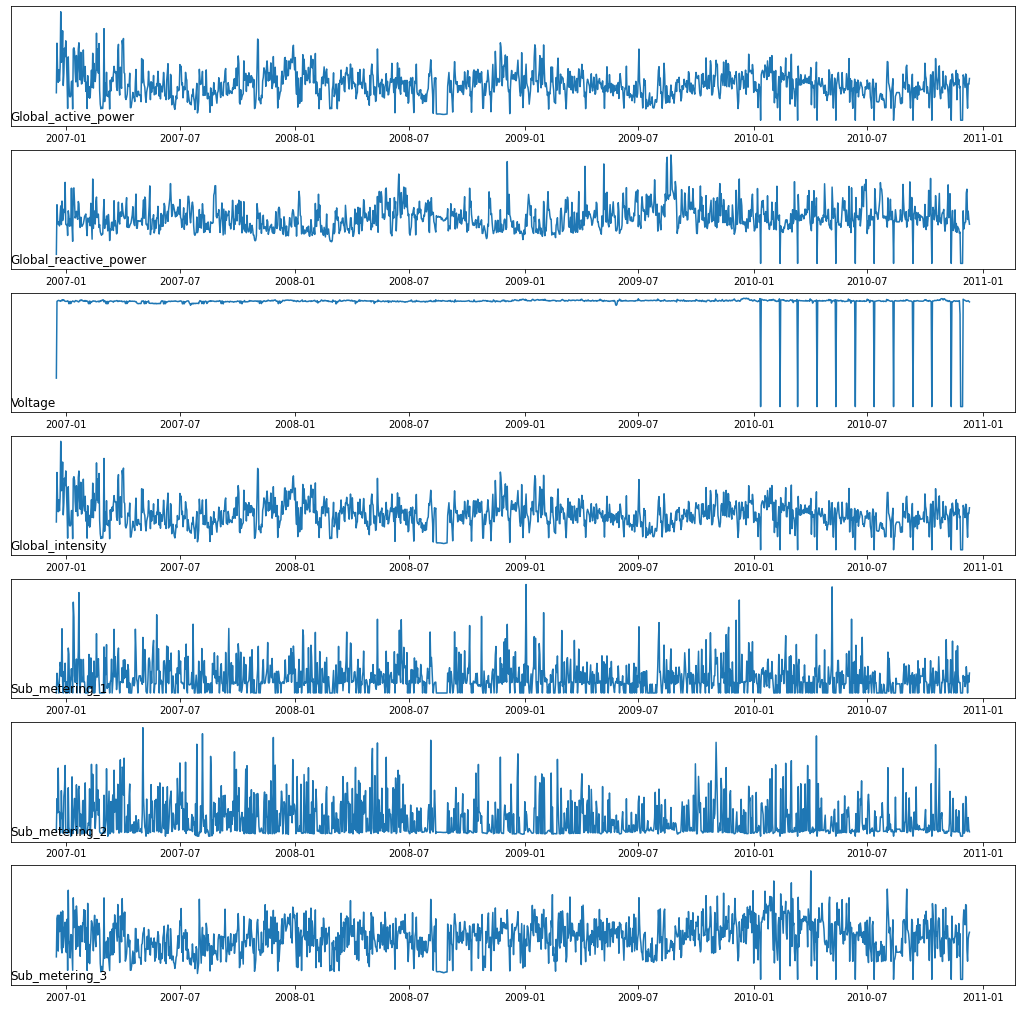

In [120]:
fig,ax = plt.subplots(figsize = (18,18))

for i in range(len(datasets.columns)):
  plt.subplot(len(datasets.columns),1,i+1)
  name = datasets.columns[i]
  plt.plot(datasets[name])
  plt.title(name,y=0,loc='left')
  plt.yticks([])

plt.show()
fig.tight_layout()

##**Exploring active power consumption for each years**

In [121]:
# Our main concern is to predict global active power
# Let's plot global active power for each years
years =['2007','2008','2009','2010']

In [122]:
# Watching all 2006 data
datasets['2006']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
2006-12-21,1723.288,144.434,347096.41,7266.4,1765.0,2692.0,10456.0
2006-12-22,2341.338,186.906,347305.75,9897.0,3151.0,350.0,11131.0
2006-12-23,4773.386,221.470,345795.95,20200.4,2669.0,425.0,14726.0
2006-12-24,2550.012,149.900,348029.91,11002.2,1703.0,5082.0,6891.0


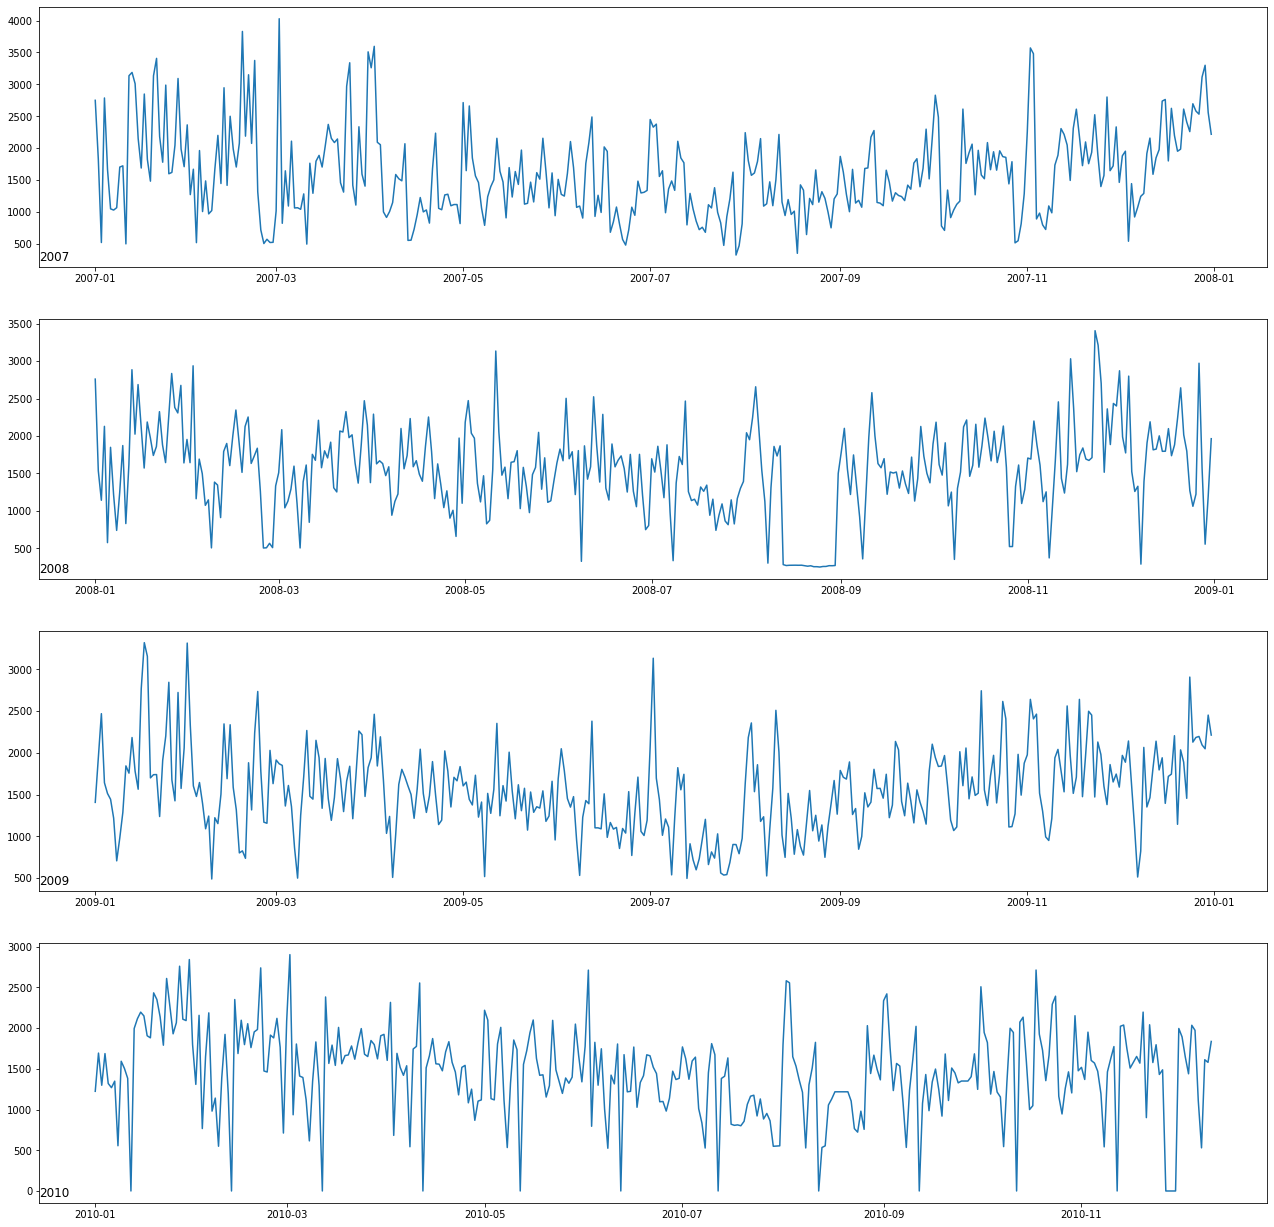

In [123]:
# Plotting year wise active data
fig,axis = plt.subplots(figsize=(22,22))

for i in range(len(years)):
  plt.subplot(len(years),1,i+1)
  year= years[i]
  yearly_active_power = datasets[str(year)]
  plt.plot(yearly_active_power['Global_active_power'])
  plt.title(year,y=0,loc='left')

plt.show()
fig.tight_layout()

## **Power consumption distribution using histogram**

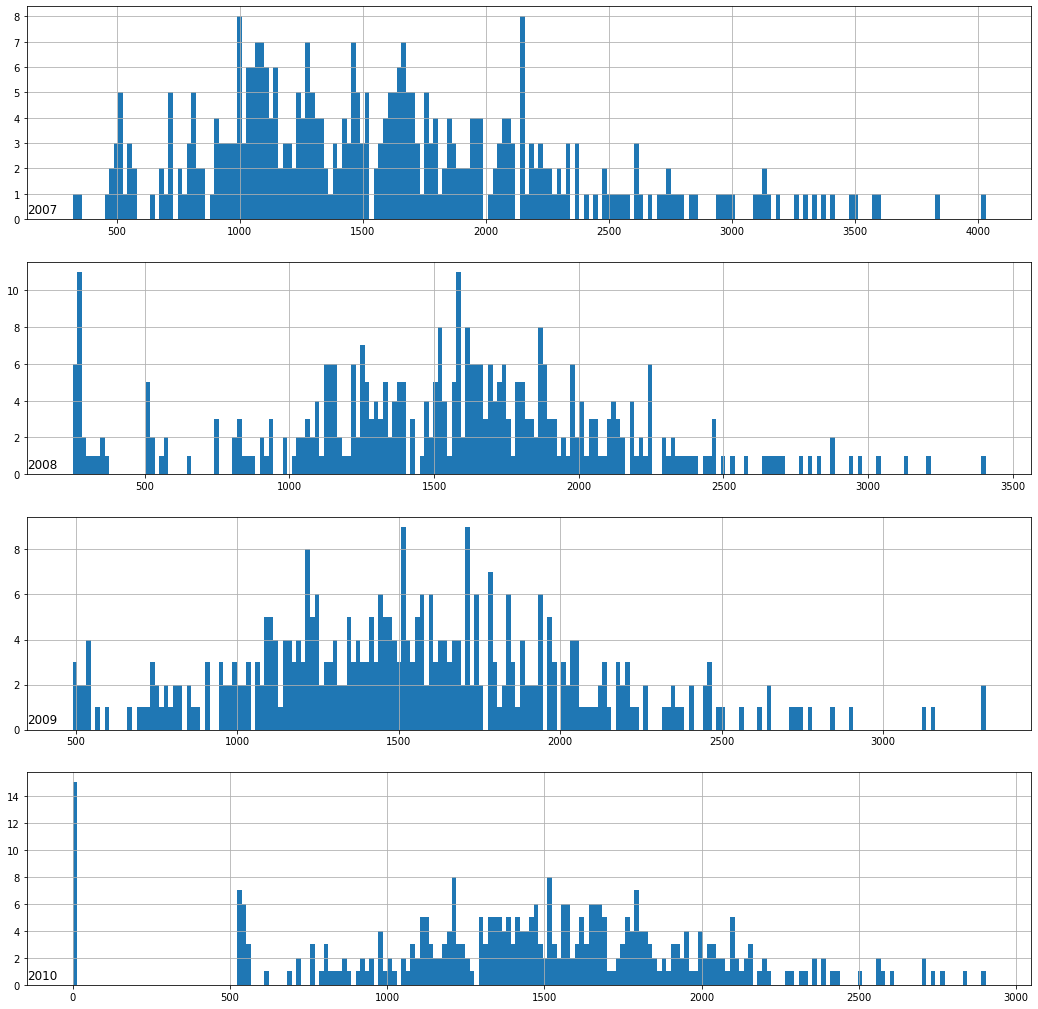

In [124]:
# Plotting year wise Global_active_power
fig,axis = plt.subplots(figsize=(18,18))

for i in range(len(years)):
  plt.subplot(len(years),1,i+1)
  year= years[i]
  yearly_active_power = datasets[str(year)]
  (yearly_active_power['Global_active_power']).hist(bins = 200)
  plt.title(year,y=0,loc='left')

plt.show()
fig.tight_layout()

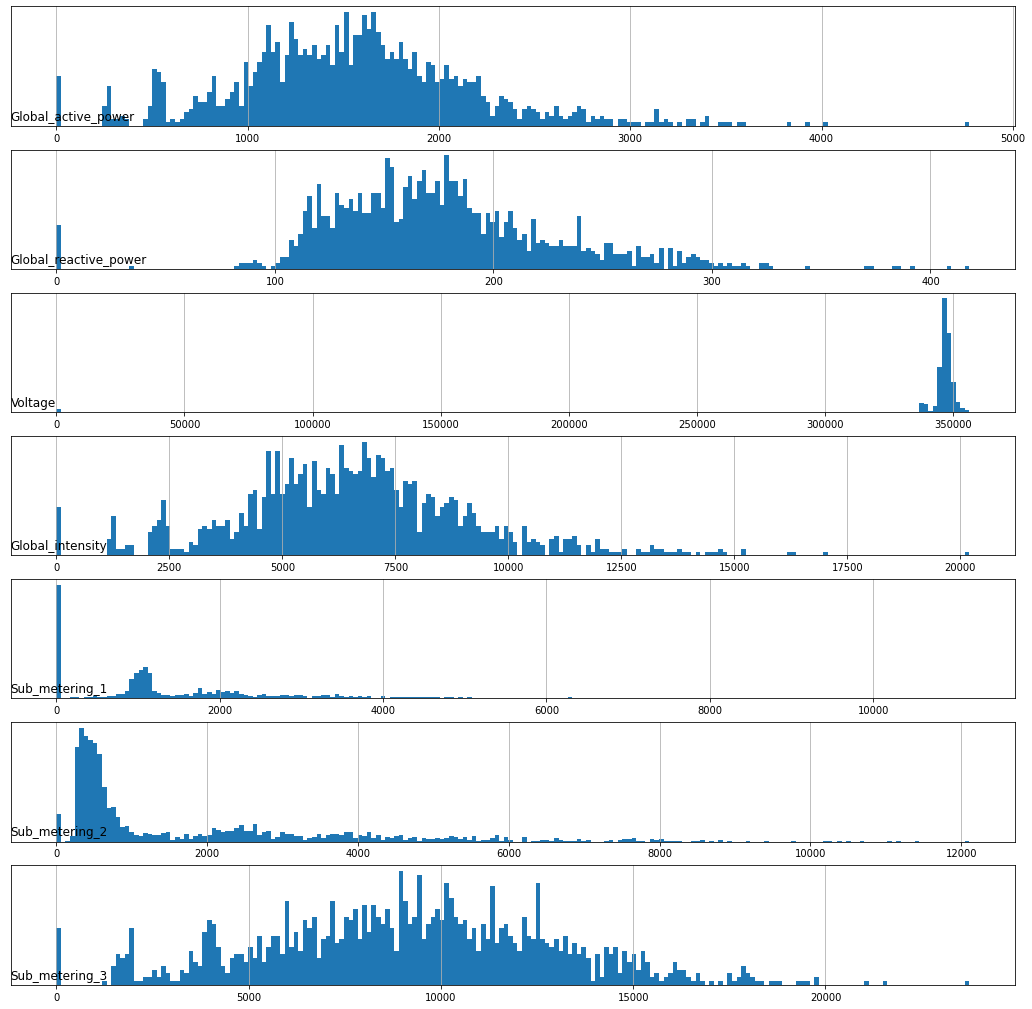

In [125]:
# Plotting all data in histogram
fig,ax = plt.subplots(figsize = (18,18))

for i in range(len(datasets.columns)):
  plt.subplot(len(datasets.columns),1,i+1)
  name = datasets.columns[i]
  datasets[name].hist(bins=200)
  plt.title(name,y=0,loc='left')
  plt.yticks([])

plt.show()
fig.tight_layout()

### **Plot power consumption histogram for each month of 2007**



In [126]:
# Loading data
dataset = pd.read_csv('preprocessed_household_power_consumption.csv',parse_dates=True,index_col='date_time',low_memory=False)
dataset.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


AssertionError: ignored

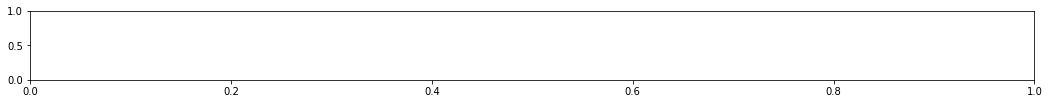

In [127]:
# months = [i for i in range(1,13)]
months=['01','02','03','04','05','06','07','08','09','10','11','12']

fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i+1)
    month = '2007-' + str(months[i])
    active_power_data = dataset[month]
    active_power_data['Global_active_power'].hist(bins = 100)
    ax.set_xlim(0,5)
    plt.title(month, y = 0, loc = 'right')
plt.show()
fig.tight_layout()

**Splitting training and testing data**

In [ ]:
# We are predicting next week global_active_power consumption by taking previous week global_active_power as input feature
# We are cosidering all data before 2010 are as training data and 2010 data are testing data

In [191]:
# training data
training_data = datasets[:'2009-12-31']
training_data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2009-12-27,2195.452,207.164,349439.10,9165.2,4218.0,318.0,12450.0
2009-12-28,2094.098,181.668,351039.76,8688.0,2175.0,2063.0,14934.0
2009-12-29,2047.968,242.050,350183.54,8514.2,1260.0,346.0,10205.0
2009-12-30,2451.110,266.794,347115.21,10322.6,5284.0,4539.0,12484.0
2009-12-31,2211.892,186.612,346980.70,9218.4,0.0,387.0,19409.0


In [192]:
# Testing data
testing_data = datasets['2010']
testing_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-01-01,1224.252,165.336,349294.64,5093.4,2304.0,327.0,3558.0
2010-01-02,1693.778,124.784,350829.71,6995.2,1111.0,367.0,14623.0
2010-01-03,1298.728,130.076,348224.80,5411.2,1785.0,471.0,7115.0
2010-01-04,1687.440,144.464,348125.99,7025.8,1780.0,517.0,14393.0
2010-01-05,1320.158,192.524,346531.92,5659.0,1984.0,4885.0,6751.0


In [193]:
# Since we are only predicting and feeding Global_active_power
training_data= training_data['Global_active_power']
testing_data = testing_data['Global_active_power']

In [194]:
training_data.head(14)

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
2006-12-21    1723.288
2006-12-22    2341.338
2006-12-23    4773.386
2006-12-24    2550.012
2006-12-25    2743.120
2006-12-26    3934.110
2006-12-27    1528.760
2006-12-28    2072.638
2006-12-29    3174.392
Freq: D, Name: Global_active_power, dtype: float64

In [195]:
testing_data[:14]

date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
2010-01-06    1268.964
2010-01-07    1349.002
2010-01-08     555.664
2010-01-09    1593.318
2010-01-10    1504.820
2010-01-11    1383.180
2010-01-12       0.000
2010-01-13    1995.796
2010-01-14    2116.224
Freq: D, Name: Global_active_power, dtype: float64

In [196]:
# Converting pandas dataframe to numpy array
training_data = np.array(training_data)
testing_data = np.array(testing_data)

In [227]:
# Creating training data
x_train = []
y_train = []

for i in range(7,len(training_data)-7):
  x_train.append(training_data[i-7:i])
  y_train.append(training_data[i:i+7])

In [139]:
len(x_train),len(y_train)

(1098, 1098)

In [142]:
x_train

[array([1209.176, 3390.46 , 2203.826, 1666.194, 2225.748, 1723.288,
        2341.338]),
 array([3390.46 , 2203.826, 1666.194, 2225.748, 1723.288, 2341.338,
        4773.386]),
 array([2203.826, 1666.194, 2225.748, 1723.288, 2341.338, 4773.386,
        2550.012]),
 array([1666.194, 2225.748, 1723.288, 2341.338, 4773.386, 2550.012,
        2743.12 ]),
 array([2225.748, 1723.288, 2341.338, 4773.386, 2550.012, 2743.12 ,
        3934.11 ]),
 array([1723.288, 2341.338, 4773.386, 2550.012, 2743.12 , 3934.11 ,
        1528.76 ]),
 array([2341.338, 4773.386, 2550.012, 2743.12 , 3934.11 , 1528.76 ,
        2072.638]),
 array([4773.386, 2550.012, 2743.12 , 3934.11 , 1528.76 , 2072.638,
        3174.392]),
 array([2550.012, 2743.12 , 3934.11 , 1528.76 , 2072.638, 3174.392,
        2796.108]),
 array([2743.12 , 3934.11 , 1528.76 , 2072.638, 3174.392, 2796.108,
        3494.196]),
 array([3934.11 , 1528.76 , 2072.638, 3174.392, 2796.108, 3494.196,
        2749.004]),
 array([1528.76 , 2072.638, 3174

In [146]:
# First seven day of the power consumption predicts next seven day of the power consumption
y_train

[array([4773.386, 2550.012, 2743.12 , 3934.11 , 1528.76 , 2072.638,
        3174.392]),
 array([2550.012, 2743.12 , 3934.11 , 1528.76 , 2072.638, 3174.392,
        2796.108]),
 array([2743.12 , 3934.11 , 1528.76 , 2072.638, 3174.392, 2796.108,
        3494.196]),
 array([3934.11 , 1528.76 , 2072.638, 3174.392, 2796.108, 3494.196,
        2749.004]),
 array([1528.76 , 2072.638, 3174.392, 2796.108, 3494.196, 2749.004,
        1824.76 ]),
 array([2072.638, 3174.392, 2796.108, 3494.196, 2749.004, 1824.76 ,
         517.564]),
 array([3174.392, 2796.108, 3494.196, 2749.004, 1824.76 ,  517.564,
        2785.952]),
 array([2796.108, 3494.196, 2749.004, 1824.76 ,  517.564, 2785.952,
        1663.858]),
 array([3494.196, 2749.004, 1824.76 ,  517.564, 2785.952, 1663.858,
        1046.09 ]),
 array([2749.004, 1824.76 ,  517.564, 2785.952, 1663.858, 1046.09 ,
        1026.664]),
 array([1824.76 ,  517.564, 2785.952, 1663.858, 1046.09 , 1026.664,
        1064.464]),
 array([ 517.564, 2785.952, 1663

In [147]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [148]:
x_train.shape,y_train.shape

((1098, 7), (1098, 7))

In [150]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6
0,1209.176,3390.460,2203.826,1666.194,2225.748,1723.288,2341.338
1,3390.460,2203.826,1666.194,2225.748,1723.288,2341.338,4773.386
2,2203.826,1666.194,2225.748,1723.288,2341.338,4773.386,2550.012
3,1666.194,2225.748,1723.288,2341.338,4773.386,2550.012,2743.120
4,2225.748,1723.288,2341.338,4773.386,2550.012,2743.120,3934.110


In [229]:
# normalizing data from 0 to 1 using MinMaxScaler
x_scaler = MinMaxScaler()
x_train = x_scaler.fit_transform(x_train)
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [207]:
# Look our scaled data 
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6
0,0.211996,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304
1,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000
2,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439
3,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133
4,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133,0.814446


In [208]:
x_train.shape

(1098, 7)

In [209]:
# Since our LSTM model takes input as 3 dimension
# reshaping x_train i.e input features to three dimension
x_train = x_train.reshape(1098,7,1)
x_train.shape

(1098, 7, 1)

## **Build LSTM model**

In [247]:
regressor = Sequential()
regressor.add(LSTM(200,activation='relu',input_shape=(7,1)))
regressor.add(Dense(7))

In [248]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 1407      
Total params: 163,007
Trainable params: 163,007
Non-trainable params: 0
_________________________________________________________________


In [249]:
regressor.compile(optimizer='adam',loss='mse')

In [250]:
regressor.fit(x_train,y_train,epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
# Saving model
regressor.save('/content/drive/My Drive/Saved_models/household power consumption.h5')

## **Preparing test datasets**

In [219]:
x_test = []
y_test = []

for i in range(7,len(testing_data)-7):
  x_test.append(testing_data[i-7:i])
  y_test.append(testing_data[i:i+7])

In [220]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [221]:
x_test.shape,y_test.shape

((331, 7), (331, 7))

In [222]:
x_test

array([[1224.252, 1693.778, 1298.728, ..., 1320.158, 1268.964, 1349.002],
       [1693.778, 1298.728, 1687.44 , ..., 1268.964, 1349.002,  555.664],
       [1298.728, 1687.44 , 1320.158, ..., 1349.002,  555.664, 1593.318],
       ...,
       [1431.164, 1488.104,    0.   , ...,    0.   ,    0.   , 1995.796],
       [1488.104,    0.   ,    0.   , ...,    0.   , 1995.796, 1892.998],
       [   0.   ,    0.   ,    0.   , ..., 1995.796, 1892.998, 1645.424]])

In [231]:
# Now normalizing our test data in between 0 to 1
x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform(y_test)

In [232]:
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6
0,0.215329,0.319136,0.231795,0.317735,0.236533,0.225215,0.242910
1,0.319136,0.231795,0.317735,0.236533,0.225215,0.242910,0.067513
2,0.231795,0.317735,0.236533,0.225215,0.242910,0.067513,0.296925
3,0.317735,0.236533,0.225215,0.242910,0.067513,0.296925,0.277360
4,0.236533,0.225215,0.242910,0.067513,0.296925,0.277360,0.250466
...,...,...,...,...,...,...,...
326,0.293436,0.341791,0.261075,0.273664,-0.055338,-0.055338,-0.055338
327,0.341791,0.261075,0.273664,-0.055338,-0.055338,-0.055338,-0.055338
328,0.261075,0.273664,-0.055338,-0.055338,-0.055338,-0.055338,0.385908
329,0.273664,-0.055338,-0.055338,-0.055338,-0.055338,0.385908,0.363181


In [233]:
x_test.shape,y_test.shape

((331, 7), (331, 7))

In [234]:
# Now reshaping x_test to 3 dimension
x_test = x_test.reshape(331,7,1)

## Testing

In [235]:
y_predict = regressor.predict(x_test)

In [236]:
y_predict

array([[ 0.25025344,  0.34794748,  0.39204556, ...,  0.4135666 ,
         0.39044023,  0.336793  ],
       [ 0.22920397,  0.32986754,  0.44016695, ...,  0.42177328,
         0.39269024,  0.36996138],
       [ 0.24674085,  0.37839597,  0.3845923 , ...,  0.3261691 ,
         0.3231967 ,  0.25025272],
       ...,
       [ 0.9571504 ,  0.78364676,  0.9543967 , ...,  0.83900607,
         0.28405684,  0.05177379],
       [ 0.7873424 ,  1.4706725 ,  1.086301  , ...,  0.78940594,
         0.2702254 ,  0.30465996],
       [ 0.37722895,  0.48475772,  0.2677459 , ...,  0.2683118 ,
        -0.01013938,  0.2589157 ]], dtype=float32)

In [237]:
# Inverting scaled value to original value
# for predicted value
y_predict = y_scaler.inverse_transform(y_predict)

In [238]:
y_predict

array([[1382.2163 , 1565.339  , 1732.0044 , ..., 1813.3414 , 1725.9371 ,
        1523.1815 ],
       [1287.0077 , 1497.0072 , 1913.8755 , ..., 1844.358  , 1734.4409 ,
        1648.5388 ],
       [1366.3285 , 1680.4167 , 1703.8353 , ..., 1483.0293 , 1471.7954 ,
        1196.1091 ],
       ...,
       [4579.573  , 3212.0312 , 3857.368  , ..., 3421.2576 , 1323.8693 ,
         445.9731 ],
       [3811.517  , 5808.593  , 4355.89   , ..., 3233.7976 , 1271.5944 ,
        1401.7372 ],
       [1956.5377 , 2082.4028 , 1262.2233 , ..., 1264.362  ,  211.97699,
        1228.8501 ]], dtype=float32)

In [240]:
# for original value
y_true = y_scaler.inverse_transform(y_test)

In [241]:
y_true

array([[ 555.664, 1593.318, 1504.82 , ...,    0.   , 1995.796, 2116.224],
       [1593.318, 1504.82 , 1383.18 , ..., 1995.796, 2116.224, 2196.76 ],
       [1504.82 , 1383.18 ,    0.   , ..., 2116.224, 2196.76 , 2150.112],
       ...,
       [1892.998, 1645.424, 1439.426, ..., 1973.382, 1109.574,  529.698],
       [1645.424, 1439.426, 2035.418, ..., 1109.574,  529.698, 1612.092],
       [1439.426, 2035.418, 1973.382, ...,  529.698, 1612.092, 1579.692]])

## **Evaluate the model**

In [242]:
def evaluate_model(y_true, y_predicted):
    scores = []
    
    #calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_predicted[:, i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
    
    #calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score = total_score + (y_true[row, col] - y_predicted[row, col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_predicted.shape[1]))
    
    return total_score, scores

In [243]:
evaluate_model(y_true,y_predict)

(780.9391561692321,
 [733.2803985581751,
  863.2413886217029,
  771.0197453398335,
  797.65038329728,
  806.4770631412217,
  774.1099341031338,
  711.2010239030724])

In [244]:
#standard deviation

np.std(y_true[0])

710.0253857243853


**Conclusion**
- From the above experiment, we have got root mean square error around 598 watts.

- In order to check whether our model is performing good or bad, we need to evaluate standard deviation which we have got here as 710 watts.

- Here mean square error is less than standard deviation. Hence, we can say that our model is performing good.